In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomFrostRegressor
from sklearn.metrics import mean_squared_error, r2_score

ImportError: cannot import name 'RandomFrostRegressor' from 'sklearn.ensemble' (C:\Users\Student\anaconda3\lib\site-packages\sklearn\ensemble\__init__.py)

In [7]:
path = r"C:\Users\Student\Downloads\Taxi_data.csv"
df = pd.read_csv(path)
df.head()

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2010-04-23 15:12:00.000000132,4.1,2010-04-23 15:12:00 UTC,-73.973925,40.748950,-73.966458,40.753695,1
1,2009-06-15 17:26:21.0000001,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1
2,2010-01-05 16:52:16.0000002,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1
3,2011-08-18 00:35:00.00000049,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2
4,2012-04-21 04:30:42.0000001,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1


In [9]:
df.shape

(9999, 8)

In [10]:
# chech for missing values
df.isnull().sum()

key                  0
fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
dtype: int64

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9999 entries, 0 to 9998
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   key                9999 non-null   object 
 1   fare_amount        9999 non-null   float64
 2   pickup_datetime    9999 non-null   object 
 3   pickup_longitude   9999 non-null   float64
 4   pickup_latitude    9999 non-null   float64
 5   dropoff_longitude  9999 non-null   float64
 6   dropoff_latitude   9999 non-null   float64
 7   passenger_count    9999 non-null   int64  
dtypes: float64(5), int64(1), object(2)
memory usage: 625.1+ KB


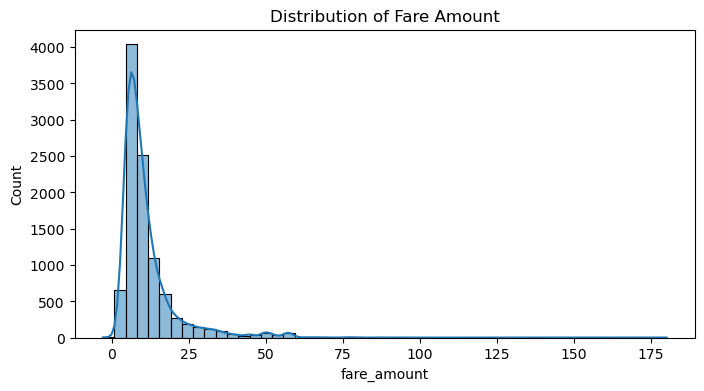

In [16]:
plt.figure(figsize=(8,4))
sns.histplot(df['fare_amount'], bins=50, kde=True)

plt.title('Distribution of Fare Amount')

plt.show()

In [17]:
pip install geopy

     -------------------------------------- 125.4/125.4 kB 1.5 MB/s eta 0:00:00
     ---------------------------------------- 40.3/40.3 kB 1.9 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [18]:
from geopy.distance import geodesic

In [19]:
# pip install geopy

In [23]:
from geopy.distance import geodesic

def calculate_distance(pickup_lat,
                      pickup_long,
                      dropoff_lat,
                      dropoff_long):
    
    return geodesic((pickup_lat, pickup_long),
               (dropoff_lat,dropoff_long)).miles

In [25]:
df = df[(df['pickup_latitude']<=90) & (df['pickup_longitude']>=-90)]
df.shape

(9998, 8)

In [27]:
import warnings


warnings.filterwarnings('ignore')

In [28]:
df.apply(lambda row: calculate_distance(row['pickup_latitude'],
                                       row['pickup_longitude'],
                                       row['dropoff_latitude'],
                                       row['dropoff_longitude']), axis=1)

0       0.510622
1       0.639764
2       5.246511
3       0.863167
4       1.737223
          ...   
9994    1.257887
9995    0.636248
9996    2.152711
9997    0.725098
9998    2.520452
Length: 9998, dtype: float64

In [29]:
df['distance'] = df.apply(lambda row: calculate_distance(row['pickup_latitude'],
                                       row['pickup_longitude'],
                                       row['dropoff_latitude'],
                                       row['dropoff_longitude']), axis=1)

print('done')

done


In [30]:
df['pickup_datetime'].info()

<class 'pandas.core.series.Series'>
Int64Index: 9998 entries, 0 to 9998
Series name: pickup_datetime
Non-Null Count  Dtype 
--------------  ----- 
9998 non-null   object
dtypes: object(1)
memory usage: 156.2+ KB


In [31]:
df['pickup_datetime'] = pd.to_datetime(df['pickup_datetime'])

In [32]:
df['pickup_datetime'].info()

<class 'pandas.core.series.Series'>
Int64Index: 9998 entries, 0 to 9998
Series name: pickup_datetime
Non-Null Count  Dtype              
--------------  -----              
9998 non-null   datetime64[ns, UTC]
dtypes: datetime64[ns, UTC](1)
memory usage: 156.2 KB


In [33]:
df['pickup_datetime'].dt.month

0        4
1        6
2        1
3        8
4        4
        ..
9994     2
9995     8
9996    10
9997    12
9998    11
Name: pickup_datetime, Length: 9998, dtype: int64

In [36]:
df['year'] = df['pickup_datetime'].dt.year
df['month'] = df['pickup_datetime'].dt.month
df['day'] = df['pickup_datetime'].dt.day
df['hour'] = df['pickup_datetime'].dt.hour
df['minute'] = df['pickup_datetime'].dt.minute
df['second'] = df['pickup_datetime'].dt.second


In [38]:
df

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,distance,year,month,day,hour,minute,second
0,2010-04-23 15:12:00.000000132,4.1,2010-04-23 15:12:00+00:00,-73.973925,40.748950,-73.966458,40.753695,1,0.510622,2010,4,23,15,12,0
1,2009-06-15 17:26:21.0000001,4.5,2009-06-15 17:26:21+00:00,-73.844311,40.721319,-73.841610,40.712278,1,0.639764,2009,6,15,17,26,21
2,2010-01-05 16:52:16.0000002,16.9,2010-01-05 16:52:16+00:00,-74.016048,40.711303,-73.979268,40.782004,1,5.246511,2010,1,5,16,52,16
3,2011-08-18 00:35:00.00000049,5.7,2011-08-18 00:35:00+00:00,-73.982738,40.761270,-73.991242,40.750562,2,0.863167,2011,8,18,0,35,0
4,2012-04-21 04:30:42.0000001,7.7,2012-04-21 04:30:42+00:00,-73.987130,40.733143,-73.991567,40.758092,1,1.737223,2012,4,21,4,30,42
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9994,2010-02-15 15:52:46.0000006,6.5,2010-02-15 15:52:46+00:00,-74.004429,40.721271,-74.006460,40.739435,3,1.257887,2010,2,15,15,52,46
9995,2010-08-27 08:45:01.0000004,4.1,2010-08-27 08:45:01+00:00,-73.983616,40.756005,-73.976169,40.763282,1,0.636248,2010,8,27,8,45,1
9996,2011-10-26 10:44:00.00000086,11.7,2011-10-26 10:44:00+00:00,-73.988277,40.748970,-73.963712,40.773958,2,2.152711,2011,10,26,10,44,0
9997,2011-12-16 15:37:00.000000179,5.7,2011-12-16 15:37:00+00:00,-74.002112,40.748727,-73.992467,40.756252,1,0.725098,2011,12,16,15,37,0


In [37]:
df.shape

(9998, 15)

In [39]:
df = df.drop(['pickup_datetime'], axis=1)

In [40]:
df.sample

<bound method NDFrame.sample of                                 key  fare_amount  pickup_longitude  \
0     2010-04-23 15:12:00.000000132          4.1        -73.973925   
1       2009-06-15 17:26:21.0000001          4.5        -73.844311   
2       2010-01-05 16:52:16.0000002         16.9        -74.016048   
3      2011-08-18 00:35:00.00000049          5.7        -73.982738   
4       2012-04-21 04:30:42.0000001          7.7        -73.987130   
...                             ...          ...               ...   
9994    2010-02-15 15:52:46.0000006          6.5        -74.004429   
9995    2010-08-27 08:45:01.0000004          4.1        -73.983616   
9996   2011-10-26 10:44:00.00000086         11.7        -73.988277   
9997  2011-12-16 15:37:00.000000179          5.7        -74.002112   
9998    2013-11-16 22:47:17.0000001         12.0        -73.992093   

      pickup_latitude  dropoff_longitude  dropoff_latitude  passenger_count  \
0           40.748950         -73.966458        

In [41]:
X = df.drop(['fare_amount','key'], axis=1)
Y = df['fare_amount']

X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2,random_state=42)

In [44]:
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)

X_test = scaler.transform(X_test)

In [46]:
from sklearn.ensemble import RandomForestRegressor

In [47]:
rf = RandomForestRegressor(n_estimators=200, random_state=42)

rf.fit(X_train, Y_train)

RandomForestRegressor(n_estimators=200, random_state=42)

In [48]:
Y_pred = rf.predict(X_test)

In [51]:
mse = mean_squared_error(Y_test, Y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(Y_test,Y_pred)

print(r2)
print(rmse)
print(mse)

NameError: name 'mean_squared_error' is not defined

In [52]:
dummy_data = X.sample().to_numpy()

rf.predict(dummy_data)[0]

28.95899999999999